<a href="https://colab.research.google.com/github/harishmuh/Deep-Learning_study/blob/main/Multi_layer_perceptron_Binary_Classification_Task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
## **Multi Layer Perceptron**
---

Now we will learn about multi layer perceptron (MLP). This method can be useful for various purposes to learn patterns and perform classification tasks. This MLP more likely to perform better than the single layer perceptron. One of weaknesess of this method can be as it requires more intense computational process and it has tendency to cause overfitting.

In this tutorial we will build binary classification model using [room occupancy dataset](https://archive.ics.uci.edu/dataset/357/occupancy+detection) from UCI ML. This model is tasked to detect whether the observed room is currently being in used or not based on several parameters (`Temperatures`, `humidity`, `light`, `CO2`)

**Initial setup**

In [20]:
# Importing library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ML libraries and Neural network
import sklearn.neural_network as ann
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.inspection import permutation_importance

In [2]:
# URL to obtain dataset
url_data_training = 'https://raw.githubusercontent.com/harishmuh/machine_learning_practices/refs/heads/main/datasets/intro_neural_network/MLP/occupancy_detection_data/datatraining.txt'


In [3]:
# Loading dataset
df_occupancy = pd.read_csv(url_data_training)
df_occupancy.head()

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
1,2015-02-04 17:51:00,23.18,27.2720,426.0,721.25,0.004793,1
2,2015-02-04 17:51:59,23.15,27.2675,429.5,714.00,0.004783,1
3,2015-02-04 17:53:00,23.15,27.2450,426.0,713.50,0.004779,1
4,2015-02-04 17:54:00,23.15,27.2000,426.0,708.25,0.004772,1
5,2015-02-04 17:55:00,23.10,27.2000,426.0,704.50,0.004757,1


**Exploratory Data Analysis**

We perform just simple EDA and data cleaning.

In [4]:
# Data dimension
df_occupancy.shape

(8143, 7)

In [5]:
# Data summary
df_occupancy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8143 entries, 1 to 8143
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           8143 non-null   object 
 1   Temperature    8143 non-null   float64
 2   Humidity       8143 non-null   float64
 3   Light          8143 non-null   float64
 4   CO2            8143 non-null   float64
 5   HumidityRatio  8143 non-null   float64
 6   Occupancy      8143 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 767.0+ KB


In [6]:
# Missing value assesment
df_occupancy.isnull().sum().to_frame('Missing values')

,Missing values
date,0
Temperature,0
Humidity,0
Light,0
CO2,0
HumidityRatio,0
Occupancy,0


In [7]:
# duplicates check
print(df_occupancy.duplicated().sum())

0


In [8]:
# Statistical descriptive
display(df_occupancy.describe(), df_occupancy.describe(include='object'))

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
count,8143.000000,8143.000000,8143.000000,8143.000000,8143.000000,8143.000000
mean,20.619084,25.731507,119.519375,606.546243,0.003863,0.212330
std,1.016916,5.531211,194.755805,314.320877,0.000852,0.408982
min,19.000000,16.745000,0.000000,412.750000,0.002674,0.000000
25%,19.700000,20.200000,0.000000,439.000000,0.003078,0.000000
50%,20.390000,26.222500,0.000000,453.500000,0.003801,0.000000
75%,21.390000,30.533333,256.375000,638.833333,0.004352,0.000000
max,23.180000,39.117500,1546.333333,2028.500000,0.006476,1.000000


,date
count,8143
unique,8143
top,2015-02-10 09:33:00
freq,1


In [9]:
# Selecting features and target
X = df_occupancy.drop(['date', 'Occupancy'], axis=1) # Features
y = df_occupancy['Occupancy'] # Target

In [10]:
# Data splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Scaling**

We perform scaling before initating neural network

In [11]:
# Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [12]:
print(X_train.min(), X_train.max())

-1.6185367678285 7.302609404758182


**Defining model**

We are setting classifier with neural network

In [13]:
# Setting classifiers and parameters
mlp = ann.MLPClassifier(hidden_layer_sizes=(3), max_iter=5) # Setting hidden layers: 3 nodes, maximum iteration 5

# Fitting
mlp.fit(X_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=3, max_iter=5)

In [14]:
# Predict to test data
y_predict = mlp.predict(X_test)

In [15]:
# Classification report
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.79      1.00      0.88      1286
           1       0.00      0.00      0.00       343

    accuracy                           0.79      1629
   macro avg       0.39      0.50      0.44      1629
weighted avg       0.62      0.79      0.70      1629



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Now, lets try to apply activation function.

In [16]:
# Adding activation function to the model
mlp = ann.MLPClassifier(hidden_layer_sizes=(3), max_iter=5, activation='logistic') # Setting hidden layers: 3 nodes, maximum iteration 5 # Activation function = logistic sigmoid

# Fitting
mlp.fit(X_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(activation='logistic', hidden_layer_sizes=3, max_iter=5)

In [17]:
# Predict to test data
y_predict = mlp.predict(X_test)

In [18]:
# Classification report
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.79      1.00      0.88      1286
           1       0.00      0.00      0.00       343

    accuracy                           0.79      1629
   macro avg       0.39      0.50      0.44      1629
weighted avg       0.62      0.79      0.70      1629



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [19]:
# we can see the coefficient
mlp.coefs_

# However this coefficents do not provide information for which feature is more important

[array([[ 0.17601642, -0.19287762, -0.48736735],
        [-0.33106404,  0.12180828, -0.15712691],
        [-0.32609686, -0.08988218, -0.24082053],
        [ 0.24798567, -0.24255515, -0.55710929],
        [-0.48257111, -0.25172706,  0.10882514]]),
 array([[-0.70151062],
        [ 0.3373277 ],
        [-0.64298018]])]

We got a fair accuracy of 0.79. We can further increases by modifying the network parameters.

**Improving MLP architecture**

In [21]:
mlp_2 = MLPClassifier(
    hidden_layer_sizes=(32,16),
    activation='relu',
    solver='adam',
    max_iter=300,
    early_stopping=True,
    random_state=42
)

mlp_2.fit(X_train, y_train)

MLPClassifier(early_stopping=True, hidden_layer_sizes=(32, 16), max_iter=300,
              random_state=42)

In [22]:
y_pred = mlp_2.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1286
           1       0.94      1.00      0.97       343

    accuracy                           0.99      1629
   macro avg       0.97      0.99      0.98      1629
weighted avg       0.99      0.99      0.99      1629



We get better accuracy of 0.99.

**Confusion matrix**

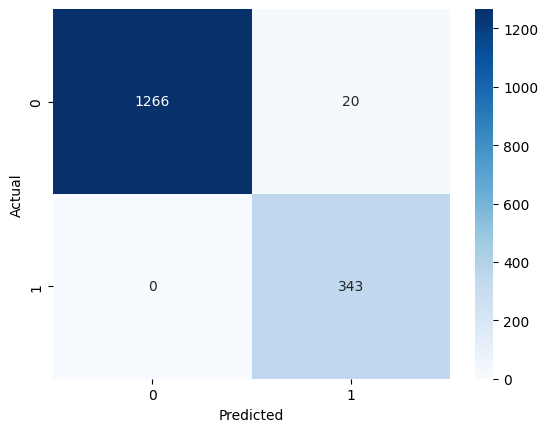

In [23]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

**ROC Curve**

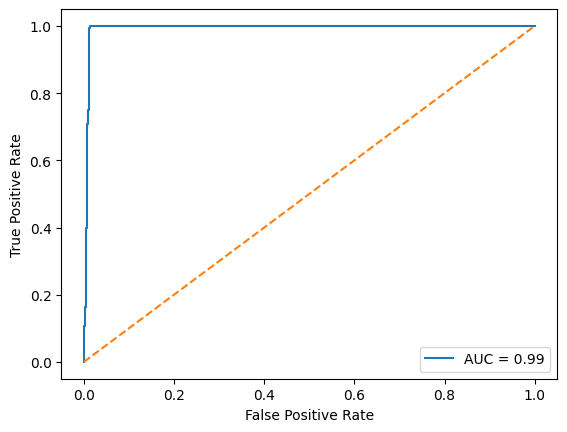

In [24]:
y_prob = mlp_2.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0,1],[0,1],'--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

**Training Loss Curve**

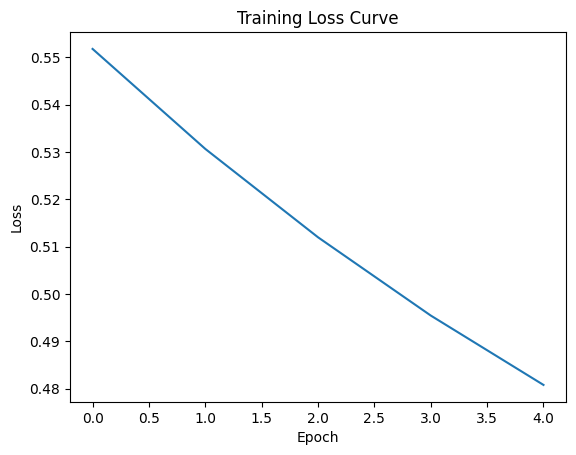

In [25]:
plt.plot(mlp.loss_curve_)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss Curve")
plt.show()


**Feature importance (permutation)**

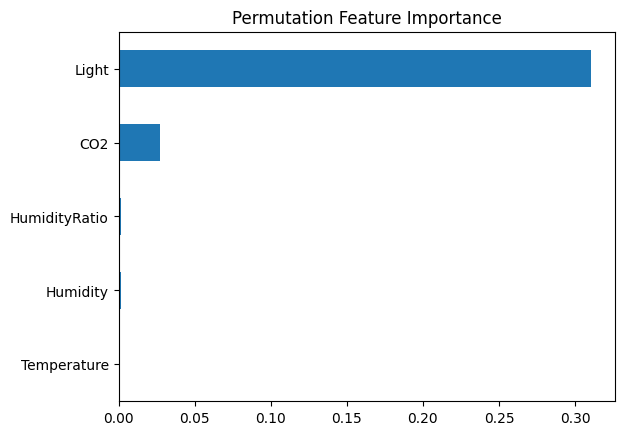

In [26]:
r = permutation_importance(
    mlp_2, X_test, y_test,
    n_repeats=10,
    random_state=42
)

importances = pd.Series(r.importances_mean, index=X.columns)
importances.sort_values().plot(kind='barh')
plt.title("Permutation Feature Importance")
plt.show()

We can see that the most important feature for Occupancy detection is light intensity.